### Basic usage

In [38]:
# this is a development environment hack!
# after pip install of sea_ingest, you'd just import sea_ingest
import __init__ as sea_ingest
from pathlib import Path
import numpy as np

data_path = Path('data')

# these return dictionaries of pandas dataframes (the default)
dfs1 = sea_ingest.read_seamf(data_path/'example_v1.sigmf')
dfs2 = sea_ingest.read_seamf(data_path/'example_v2.sigmf')
dfs3 = sea_ingest.read_seamf(data_path/'example_v3.sigmf')
dfs4 = sea_ingest.read_seamf(data_path/'example_v4.sigmf')

# some alternative loading options
arrs4 = sea_ingest.read_seamf(data_path/'example_v4.sigmf', container_cls=np.ndarray)
data4, meta4 = sea_ingest.read_seamf(data_path/'example_v4.sigmf', force_loader_cls=bytes)

### Performance

In [39]:
for version in (1,2,3,4):
    print(f'======= file version {version} =========')
    print('Metadata only:')
    %timeit -n100 -r6 sea_ingest.read_seamf_meta(data_path/f'example_v{version}.sigmf')

    print('File read raw bytes:')
    %timeit -n10 -r10 sea_ingest.read_seamf(data_path/f'example_v{version}.sigmf', force_loader_cls=None)

    print('File read + metadata scan + unpack numpy.ndarray:')
    %timeit -n10 -r10 sea_ingest.read_seamf(data_path/f'example_v{version}.sigmf', container_cls=np.ndarray)

    print('File read + metadata scan + unpack numpy.ndarray -> pd.DataFrame:')
    %timeit -n10 -r10 sea_ingest.read_seamf(data_path/f'example_v{version}.sigmf')
    print('\n')


======= file version 1 =========
Metadata only:
2.01 ms ± 209 µs per loop (mean ± std. dev. of 6 runs, 100 loops each)
File read raw bytes:
9.26 ms ± 552 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
File read + metadata scan + unpack numpy.ndarray:
10.7 ms ± 812 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
File read + metadata scan + unpack numpy.ndarray -> pd.DataFrame:
17.3 ms ± 1.67 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


======= file version 2 =========
Metadata only:
1.03 ms ± 75.7 µs per loop (mean ± std. dev. of 6 runs, 100 loops each)
File read raw bytes:
8.42 ms ± 402 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
File read + metadata scan + unpack numpy.ndarray:
10.1 ms ± 813 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
File read + metadata scan + unpack numpy.ndarray -> pd.DataFrame:
20.3 ms ± 5.07 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


======= file version 3 =========
Metadata only:
1.8 ms 

### Returned data structure

In [40]:
# channel metadata
dfs4["channel_metadata"]

,,overload,iq_capture_duration_ms,cal_noise_figure_dB,cal_gain_dB,cal_temperature_degC,sigan_reference_level_dBm,sigan_attenuation_dB,sigan_preamp_enable
datetime,frequency,,,,,,,,
2023-03-31T21:59:59.195Z,3.555000e+09,False,4000,6.877,22.243,13.4,-25.0,0.0,True
2023-03-31T22:00:03.070Z,3.565000e+09,False,4000,6.304,23.139,13.4,-25.0,0.0,True
2023-03-31T22:00:07.292Z,3.575000e+09,False,4000,6.479,22.847,13.4,-25.0,0.0,True
2023-03-31T22:00:11.701Z,3.585000e+09,False,4000,6.251,23.275,13.4,-25.0,0.0,True
2023-03-31T22:00:15.547Z,3.595000e+09,False,4000,6.81,22.225,13.4,-25.0,0.0,True
2023-03-31T22:00:20.484Z,3.605000e+09,False,4000,6.174,23.547,13.4,-25.0,0.0,True
2023-03-31T22:00:24.322Z,3.615000e+09,False,4000,6.836,22.46,13.4,-25.0,0.0,True
2023-03-31T22:00:28.201Z,3.625000e+09,False,4000,6.657,22.531,13.4,-25.0,0.0,True
2023-03-31T22:00:32.439Z,3.635000e+09,False,4000,6.257,23.438,13.4,-25.0,0.0,True


In [41]:
# power spectral density has a "capture_statistic" index
dfs4['psd'].head(6).iloc[:,:6]

Baseband Frequency (Hz)                          -5000000.0  -4984000.0  \
datetime                 frequency    statistic                           
2023-03-31T21:59:59.195Z 3.555000e+09 max          -157.750    -155.375   
                                      mean         -168.375    -167.125   
2023-03-31T22:00:03.070Z 3.565000e+09 max          -134.625    -132.500   
                                      mean         -151.375    -150.000   
2023-03-31T22:00:07.292Z 3.575000e+09 max          -142.875    -142.625   
                                      mean         -154.875    -155.250   

Baseband Frequency (Hz)                          -4968000.0  -4952000.0  \
datetime                 frequency    statistic                           
2023-03-31T21:59:59.195Z 3.555000e+09 max          -154.750    -155.625   
                                      mean         -166.625    -166.625   
2023-03-31T22:00:03.070Z 3.565000e+09 max          -131.625    -132.875   
                                      mean         -149.625    -149.875   
2023-03-31T22:00:07.292Z 3.575000e+09 max          -142.625    -141.625   
                                      mean         -157.500    -157.000   

Baseband Frequency (Hz)                          -4936000.0  -4920000.0  
datetime                 frequency    statistic                          
2023-03-31T21:59:59.195Z 3.555000e+09 max          -156.125    -156.250  
                                      mean         -166.625    -166.625  
2023-03-31T22:00:03.070Z 3.565000e+09 max          -133.750    -133.000  
                                      mean         -150.125    -150.125  
2023-03-31T22:00:07.292Z 3.575000e+09 max          -140.875    -140.875  
                                      mean         -155.875    -155.625

<AxesSubplot: xlabel='Baseband Frequency (Hz)', ylabel='PSD (dBm/Hz)'>

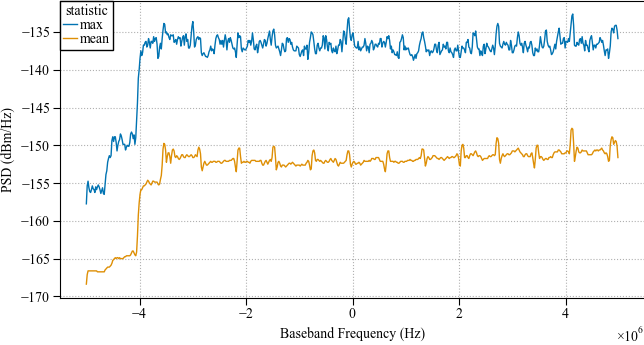

In [42]:
from matplotlib import pyplot as plt
plt.style.use('report.mplstyle')

(
    dfs4['psd']
    .droplevel('datetime')
    .loc(axis=0)[3.555e9]
    .T
    .plot(ylabel='PSD (dBm/Hz)')
)

In [43]:
dfs4['pfp'].head(12).iloc[:,:6]

Frame time elapsed (s)                                    0.000000  0.000018  \
datetime                 frequency    detector statistic                       
2023-03-31T21:59:59.195Z 3.555000e+09 mean     min        -82.5000  -82.3125   
                                               max        -77.5000  -78.3125   
                                               mean       -80.1250  -79.9375   
                                      max      min        -75.5625  -75.4375   
                                               max        -68.2500  -67.1250   
                                               mean       -71.6250  -71.5625   
2023-03-31T22:00:03.070Z 3.565000e+09 mean     min        -79.3125  -79.3750   
                                               max        -74.4375  -74.1250   
                                               mean       -76.6250  -76.8125   
                                      max      min        -70.9375  -70.5625   
                                               max        -63.7500  -64.3125   
                                               mean       -68.0000  -67.8750   

Frame time elapsed (s)                                    0.000036  0.000054  \
datetime                 frequency    detector statistic                       
2023-03-31T21:59:59.195Z 3.555000e+09 mean     min        -83.0000  -90.5000   
                                               max        -78.0000  -81.1250   
                                               mean       -80.0625  -84.9375   
                                      max      min        -75.0000  -77.6250   
                                               max        -67.0000  -70.0625   
                                               mean       -71.5000  -73.4375   
2023-03-31T22:00:03.070Z 3.565000e+09 mean     min        -80.0625  -79.8125   
                                               max        -74.7500  -75.0625   
                                               mean       -77.2500  -77.6250   
                                      max      min        -71.4375  -71.3750   
                                               max        -65.0000  -64.1875   
                                               mean       -68.2500  -68.1250   

Frame time elapsed (s)                                    0.000071  0.000089  
datetime                 frequency    detector statistic                      
2023-03-31T21:59:59.195Z 3.555000e+09 mean     min        -90.8125  -90.6250  
                                               max        -86.8750  -86.5000  
                                               mean       -88.8750  -88.9375  
                                      max      min        -78.3125  -78.5000  
                                               max        -68.9375  -69.1250  
                                               mean       -73.8750  -74.3750  
2023-03-31T22:00:03.070Z 3.565000e+09 mean     min        -79.8750  -79.8125  
                                               max        -76.0625  -76.7500  
                                               mean       -78.0625  -78.5625  
                                      max      min        -71.3750  -72.3125  
                                               max        -65.0625  -64.6875  
                                               mean       -68.4375  -68.7500

<AxesSubplot: xlabel='Frame time elapsed (s)', ylabel='PFP (dBm/10MHz)'>

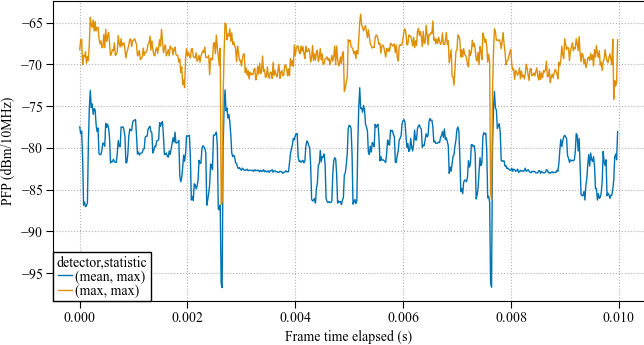

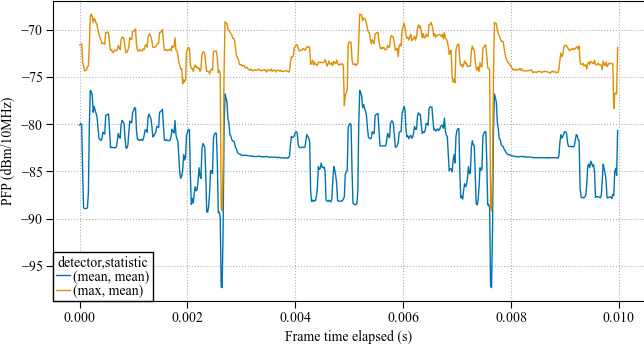

In [44]:
fig, ax = plt.subplots()
(
    dfs4['pfp']
    .loc(axis=0)[:,3.555e9,:,'max']  # Before v4, change "max" to "peak"
    .droplevel(['datetime','frequency'])
    .T
    .plot(ax=ax, ylabel='PFP (dBm/10MHz)')
)

fig, ax = plt.subplots()
(
    dfs4['pfp']
    .loc(axis=0)[:,3.555e9,:,'mean']  # Before v4, chane "mean" to "rms"
    .droplevel(['datetime','frequency'])
    .T
    .plot(ax=ax, ylabel='PFP (dBm/10MHz)')
)

In [45]:
dfs4['apd'].head(12).iloc[:,:8]

,Channel Power (dBm/10MHz),-180,-179,-178,-177,-176,-175,-174,-173
datetime,frequency,,,,,,,,
2023-03-31T21:59:59.195Z,3.555000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-03-31T22:00:03.070Z,3.565000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-03-31T22:00:07.292Z,3.575000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-03-31T22:00:11.701Z,3.585000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-03-31T22:00:15.547Z,3.595000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-03-31T22:00:20.484Z,3.605000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-03-31T22:00:24.322Z,3.615000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-03-31T22:00:28.201Z,3.625000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-03-31T22:00:32.439Z,3.635000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


3555000000.0
1.0   -180
1.0   -179
1.0   -178
1.0   -177
1.0   -176
      ... 
NaN    -34
NaN    -33
NaN    -32
NaN    -31
NaN    -30
Length: 151, dtype: int64

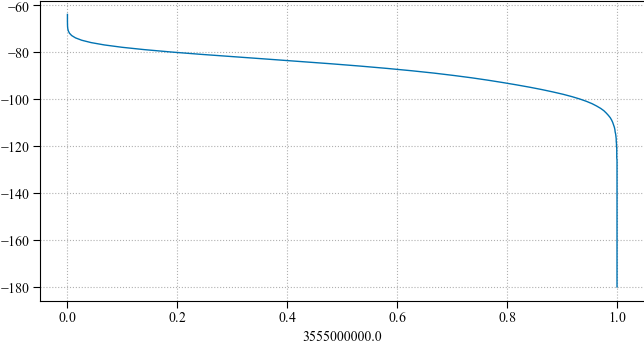

In [46]:
import pandas as pd
fig, ax = plt.subplots()

apd = (
    dfs4['apd']
    .droplevel('datetime')
    .loc[3.555e9]
)
# Crude APD plot: does not apply Rayleigh axis scaling
# This just shows that the index/data are reversed from what would be expected

# one solution is to create a new series, swapping the axis for the channel data:
apd = pd.Series(apd.index.values, index=apd)
apd.plot()
apd
